In [1]:
from Scripts.tagger import generateTags
from Scripts.evaluator import eval
from Scripts.plotting import plot_result
from Scripts.toolOverlap import getOverlap
from Scripts.election import electLabel
from Scripts.toolOverlap_perVuln import getOverlapPerV
from Scripts.ToolEfficiency import get_toolEfficiency
from Scripts.createPerformanceOutFiles import createPerformanceOutFiles

import pandas as pd
import os

# Stop warnings
import warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

In [3]:
Tools = ['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart']
Bases = ['TestSet']

In [8]:
#create avgAnalysisTimeAndFailureRate files if not exit
files = os.listdir('./Results/Performance/')
if not 'avgAnalysisTimeAndFailureRate.csv' in files or not 'avgAnalysisTimeAndFailureRate_Fair.csv' in files:
    createPerformanceOutFiles(Tools,Bases)

# **1. Git Labled DS**
* Call generateTags method to git the labeled DS as follow: generateTags('Tool Name',reportSource)
* reportSource is an integer number 0 or 1.
    - 0: Tool is used directly.
    - 1: Smartbugs framework is used to run the tool.
---

## **1.1 MAIAN-based Labeled DS**
---

In [ ]:
MAIANDS =pd.DataFrame(generateTags('MAIAN',1))

In [3]:
MAIANDS

,contractAddress,MAIAN_Labels,MAIAN_AnalysisTime,MAIAN_SWC_Code,MAIAN_SWC_Title,MAIAN_DASP_Rank,MAIAN_DASP_Title
0,002d5f79eff9f8d6d47a61fdaf5bf0c6,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",171.614084,[],[],[],[]
1,003c84ce2828441c5cf062c642d5492c,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",36.482624,[],[],[],[]
2,007c010f1192c459d19859ee01c41a34,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",126.963233,[],[],[],[]
3,00805ffc6f3b3ead5a87d50efd5ac2be,safe,32.757294,[],[],[],[]
4,008ee0364adf0932325253f494e9851b,"[Ether_leak_verified, No_Ether_lock_Ether_refu...",51.504314,[105.0],[Unprotected Ether Withdrawal],[2.0],[Access Control]
...,...,...,...,...,...,...,...
2516,ffb80f16332c0d6d30c4b5288b11be77,"[No_Ether_leak_no_send, No_Ether_lock_Ether_re...",117.751608,[],[],[],[]
2517,ffe71a13007dd42188e6b7bb58462db3,safe,51.640797,[],[],[],[]
2518,ffeac25177f5c45eaac5cc835aff448e,"[Ether_leak, Not_destructible_no_self_destruct]",33.088611,[105.0],[Unprotected Ether Withdrawal],[2.0],[Access Control]
2519,fff46ce83645621861027fc94593e924,"[Ether_lock_Ether_accepted_without_send, No_Et...",47.123997,[132.0],[Unexpected Ether balance],[5.0],[DoS]


## **1.2. Mythril-based Labeled DS**
---

In [5]:
MythrilDS =pd.DataFrame(generateTags('Mythril',0))
MythrilDS

Mythril tags have been extracted successfully


,contractAddress,Mythril_Labels,Mythril_AnalysisTime,Mythril_SWC_Code,Mythril_SWC_Title,Mythril_DASP_Rank,Mythril_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,safe,319.675730917,[],[],[],[]
1,dde77fad873fc09aca4825971a6bf4ab,safe,313.557311921,[],[],[],[]
2,4c7eda457bb013264b3a749886513cbf,"[107, 113, 114, 104, 105]",211.980961575,"[107, 113, 114, 104, 105]","[Reentrancy, DoS with Failed Call, Transaction...","[1, 5, 7, 4, 2]","[Reentrancy, DoS, Front-Running, Unchecked Ret..."
3,0d379be1f89da0c9303fb0bf0000422d,[114],5.622071384,[114],[Transaction Order Dependence],[7],[Front-Running]
4,177cc199d3f91975d6ef41a0bdc10092,[error],1.062146192,[error],[error],[error],[error]
...,...,...,...,...,...,...,...
2523,d7d0302d58b33b4ac6d5f148b03b19d4,safe,27.615181013,[],[],[],[]
2524,d1cb4dd66663151973e7194ed24db0d7,[error],1.047249731,[error],[error],[error],[error]
2525,31eeb099e77105315e7837c7b9296a18,"[101, 116]",7.666180663,"[101, 116]","[Integer Overflow and Underflow, Block values ...","[3, 8]","[Arithmetic Issues, Time manipulation]"
2526,30b5b6a7814903c04b286d932964be3d,[116],311.495238547,[116],[Block values as a proxy for time],[8],[Time manipulation]


## **1.3. Semgrep-based Labeled DS**
---

In [ ]:
SemgrepDS =pd.DataFrame(generateTags('Semgrep',1))

In [7]:
SemgrepDS

,contractAddress,Semgrep_Labels,Semgrep_AnalysisTime,Semgrep_SWC_Code,Semgrep_SWC_Title,Semgrep_DASP_Rank,Semgrep_DASP_Title
0,002d5f79eff9f8d6d47a61fdaf5bf0c6,"[init_variables_with_default_value, use_ownabl...",1.974213,[],[],[10.0],[Unknown Unknowns]
1,003c84ce2828441c5cf062c642d5492c,"[array_length_outside_loop, inefficient_state_...",1.920049,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
2,007c010f1192c459d19859ee01c41a34,[use_ownable2step],1.900813,[],[],[],[]
3,00805ffc6f3b3ead5a87d50efd5ac2be,"[inefficient_state_variable_increment, use_nes...",1.977787,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
4,008ee0364adf0932325253f494e9851b,"[init_variables_with_default_value, use_nested...",1.942614,[],[],[10.0],[Unknown Unknowns]
...,...,...,...,...,...,...,...
2517,ffb80f16332c0d6d30c4b5288b11be77,[use_ownable2step],1.942096,[],[],[],[]
2518,ffe71a13007dd42188e6b7bb58462db3,"[inefficient_state_variable_increment, state_v...",1.827747,[129.0],[Typographical Error],[10.0],[Unknown Unknowns]
2519,ffeac25177f5c45eaac5cc835aff448e,[use_nested_if],2.008317,[],[],[10.0],[Unknown Unknowns]
2520,fff46ce83645621861027fc94593e924,safe,1.994844,[],[],[],[]


## **1.4. Slither-based Labeled DS**
---

In [2]:
SlitherDS =pd.DataFrame(generateTags('Slither',0))
SlitherDS

Slither tags have been extracted successfully


,contractAddress,Slither_Labels,Slither_AnalysisTime,Slither_SWC_Code,Slither_SWC_Title,Slither_DASP_Rank,Slither_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[uninitialized-state, events-maths, solc-versi...",.451545109,"[109.0, 102.0, 107.0]","[Uninitialized Storage Pointer, Outdated Compi...","[10.0, 1.0]","[Unknown Unknowns, Reentrancy]"
1,dde77fad873fc09aca4825971a6bf4ab,"[arbitrary-send-eth, reentrancy-eth, solc-vers...",.420815448,"[105.0, 107.0, 102.0, 104.0]","[Unprotected Ether Withdrawal, Reentrancy, Out...","[2.0, 1.0, 10.0, 4.0]","[Access Control, Reentrancy, Unknown Unknowns,..."
2,4c7eda457bb013264b3a749886513cbf,"[arbitrary-send-erc20, arbitrary-send-eth, eve...",.321185925,"[105.0, 113.0, 102.0, 107.0]","[Unprotected Ether Withdrawal, DoS with Failed...","[2.0, 5.0, 10.0, 1.0]","[Access Control, DoS, Unknown Unknowns, Reentr..."
3,0d379be1f89da0c9303fb0bf0000422d,"[solc-version, naming-convention]",.281484293,[102.0],[Outdated Compiler Version],[10.0],[Unknown Unknowns]
4,177cc199d3f91975d6ef41a0bdc10092,"[deprecated-standards, solc-version, low-level...",.332860281,"[111.0, 102.0, 104.0, 131.0]","[Use of Deprecated Solidity Functions, Outdate...","[10.0, 4.0]","[Unknown Unknowns, Unchecked Return Values For..."
...,...,...,...,...,...,...,...
2320,d7d0302d58b33b4ac6d5f148b03b19d4,[solc-version],.285438490,[102.0],[Outdated Compiler Version],[10.0],[Unknown Unknowns]
2321,d1cb4dd66663151973e7194ed24db0d7,"[missing-zero-check, deprecated-standards, sol...",.291304560,"[105.0, 111.0, 102.0]","[Unprotected Ether Withdrawal, Use of Deprecat...","[2.0, 10.0]","[Access Control, Unknown Unknowns]"
2322,31eeb099e77105315e7837c7b9296a18,"[shadowing-state, timestamp, solc-version, ree...",.300851181,"[119.0, 116.0, 102.0, 107.0]","[Shadowing State Variables, Block values as a ...","[10.0, 8.0, 1.0]","[Unknown Unknowns, Time manipulation, Reentrancy]"
2323,30b5b6a7814903c04b286d932964be3d,"[erc20-interface, reentrancy-events, timestamp...",.340238834,"[107.0, 116.0, 135.0, 102.0, 131.0]","[Reentrancy, Block values as a proxy for time,...","[1.0, 8.0, 10.0]","[Reentrancy, Time manipulation, Unknown Unknowns]"


## **1.5. Solhint-based Labeled DS**
---

In [3]:
SolhintDS =pd.DataFrame(generateTags('Solhint',0))
SolhintDS

Solhint tags have been extracted successfully


,contractAddress,Solhint_Labels,Solhint_AnalysisTime,Solhint_SWC_Code,Solhint_SWC_Title,Solhint_DASP_Rank,Solhint_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[compiler-version, contract-name-camelcase, ma...",.794517290,"[103.0, 108.0, 107.0]","[Floating Pragma, State Variable Default Visib...","[10, 2, 1]","[Unknown Unknowns, Access Control, Reentrancy]"
1,dde77fad873fc09aca4825971a6bf4ab,"[compiler-version, contract-name-camelcase, ma...",.704679352,"[103.0, 108.0, 107.0, 104.0]","[Floating Pragma, State Variable Default Visib...","[10, 2, 1, 4]","[Unknown Unknowns, Access Control, Reentrancy,..."
2,4c7eda457bb013264b3a749886513cbf,"[one-contract-per-file, compiler-version, cont...",.697282162,"[103.0, 104.0]","[Floating Pragma, Unchecked Call Return Value]","[10, 5, 4]","[Unknown Unknowns, DoS, Unchecked Return Value..."
3,0d379be1f89da0c9303fb0bf0000422d,"[compiler-version, contract-name-camelcase, re...",.688934462,[103.0],[Floating Pragma],[10],[Unknown Unknowns]
4,177cc199d3f91975d6ef41a0bdc10092,"[one-contract-per-file, compiler-version, func...",.689365301,"[103.0, 100.0, 108.0, 104.0]","[Floating Pragma, Function Default Visibility,...","[10, 2, 4]","[Unknown Unknowns, Access Control, Unchecked R..."
...,...,...,...,...,...,...,...
2548,d7d0302d58b33b4ac6d5f148b03b19d4,"[compiler-version, explicit-types, reason-stri...",.652642626,[103.0],[Floating Pragma],[10],[Unknown Unknowns]
2549,d1cb4dd66663151973e7194ed24db0d7,"[compiler-version, explicit-types, avoid-throw...",.669446569,"[103.0, 100.0, 104.0]","[Floating Pragma, Function Default Visibility,...","[10, 2, 4]","[Unknown Unknowns, Access Control, Unchecked R..."
2550,31eeb099e77105315e7837c7b9296a18,"[one-contract-per-file, compiler-version, func...",.679187970,"[103.0, 100.0, 116.0, 107.0]","[Floating Pragma, Function Default Visibility,...","[10, 2, 5, 8, 1]","[Unknown Unknowns, Access Control, DoS, Time m..."
2551,30b5b6a7814903c04b286d932964be3d,"[one-contract-per-file, compiler-version, cont...",.705358622,"[103.0, 100.0, 108.0, 116.0, 107.0, 113.0]","[Floating Pragma, Function Default Visibility,...","[10, 2, 8, 1, 5]","[Unknown Unknowns, Access Control, Time manipu..."


## **1.6. VeriSmart-based Labeled DS**
---

In [ ]:
VeriSmartDS =pd.DataFrame(generateTags('VeriSmart',0))
VeriSmartDS

VeriSmart tags have been extracted successfully


,contractAddress,VeriSmart_Labels,VeriSmart_AnalysisTime,VeriSmart_SWC_Code,VeriSmart_SWC_Title,VeriSmart_DASP_Rank,VeriSmart_DASP_Title
0,68274dd0420f2a50c800c48696c56aee,"[IO, ETH_LEAK]",300.570048,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"
1,dde77fad873fc09aca4825971a6bf4ab,"[IO, ETH_LEAK]",302.114627,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"
2,4c7eda457bb013264b3a749886513cbf,safe,0.,[],[],[],[]
3,0d379be1f89da0c9303fb0bf0000422d,[ETH_LEAK],2.439025,[105.0],[Unprotected Ether Withdrawal],[2],[Access Control]
4,177cc199d3f91975d6ef41a0bdc10092,safe,0.,[],[],[],[]
...,...,...,...,...,...,...,...
2533,d7d0302d58b33b4ac6d5f148b03b19d4,[IO],0.060747,[101.0],[Integer Overflow and Underflow],[3],[Arithmetic Issues]
2534,d1cb4dd66663151973e7194ed24db0d7,safe,0.,[],[],[],[]
2535,31eeb099e77105315e7837c7b9296a18,[IO],65.365674,[101.0],[Integer Overflow and Underflow],[3],[Arithmetic Issues]
2536,30b5b6a7814903c04b286d932964be3d,"[IO, ETH_LEAK]",301.191178,"[101.0, 105.0]","[Integer Overflow and Underflow, Unprotected E...","[3, 2]","[Arithmetic Issues, Access Control]"


# **2.Get vote-based labeled data**
---

## **2.1. Fair vote**
---

In [4]:
labeledDS =electLabel(Bases,['all'],Fair=True)
labeledDS

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


toolsPerformanceDic:
 {'Reentrancy': {'MAIAN': {'Recall': 0.0, 'Precision': nan}, 'Mythril': {'Recall': 0.8695652173913043, 'Precision': 0.2531645569620253}, 'Semgrep': {'Recall': 0.0144927536231884, 'Precision': 0.1111111111111111}, 'Slither': {'Recall': 0.9855072463768116, 'Precision': 0.201780415430267}, 'Solhint': {'Recall': 0.6666666666666666, 'Precision': 0.2100456621004566}, 'VeriSmart': {'Recall': 0.0, 'Precision': nan}}, 'Access Control': {'MAIAN': {'Recall': 0.1413043478260869, 'Precision': 0.3333333333333333}, 'Mythril': {'Recall': 0.8152173913043478, 'Precision': 0.211864406779661}, 'Semgrep': {'Recall': 0.0326086956521739, 'Precision': 1.0}, 'Slither': {'Recall': 0.8152173913043478, 'Precision': 0.1599147121535181}, 'Solhint': {'Recall': 0.8369565217391305, 'Precision': 0.143389199255121}, 'VeriSmart': {'Recall': 0.6195652173913043, 'Precision': 0.1565934065934066}}, 'Arithmetic': {'MAIAN': {'Recall': 0.0, 'Precision': nan}, 'Mythril': {'Recall': 0.8709677419354839, 'Preci

,id,Tools,DASP,1,1_AtLeastOne,1_Majority,1_Power-based,2,2_AtLeastOne,2_Majority,...,8_Majority,8_Power-based,9,9_AtLeastOne,9_Majority,9_Power-based,10,10_AtLeastOne,10_Majority,10_Power-based
0,002d5f79eff9f8d6d47a61fdaf5bf0c6,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[1, 2, 5, 7, 8, 10]","[1, 0, 0, 1]",1,1,1,"[0, 1, 0, 1, 1, 0]",1,1,...,1,1,[],0,0,,"[1, 1, 1, 1]",1,1,
1,007c010f1192c459d19859ee01c41a34,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[10, 2]","[0, 0, 0, 0]",0,0,0,"[0, 0, 0, 0, 1, 0]",1,0,...,0,0,[],0,0,,"[1, 0, 1, 1]",1,1,
2,008ee0364adf0932325253f494e9851b,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[1, 2.0, 3.0, 5, 10]","[1, 0, 0, 0]",1,0,1,"[1, 0, 0, 0, 1, 1]",1,1,...,0,0,[],0,0,,"[1, 1, 1, 1]",1,1,
3,0120a2934d0ffe4b904830fe899f554b,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[1, 2, 4, 5, 7, 10.0]","[1, 0, 0, 0]",1,0,1,"[0, 1, 0, 1, 0, 0]",1,0,...,0,0,[],0,0,,"[0, 0, 1, 1]",1,1,
4,01affacb32dcc51263a8bd96d85c0929,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[2, 3, 5, 7, 10]","[0, 0, 0, 0]",0,0,0,"[0, 1, 0, 1, 1, 0]",1,1,...,0,0,[],0,0,,"[1, 1, 1, 1]",1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,ff08f0e6f27166cfe8eccb1cfa70dfea,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[1.0, 2, 5, 7, 8, 10]","[0, 0, 1, 0]",1,0,1,"[0, 1, 0, 1, 1, 0]",1,1,...,1,1,[],0,0,,"[1, 1, 1, 1]",1,1,
1530,ff697b9d3d3c7ced362be9845734ac99,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[2, 10, 5.0]","[0, 0, 0, 0]",0,0,0,"[0, 1, 0, 1, 1, 0]",1,1,...,0,0,[],0,0,,"[1, 1, 1, 1]",1,1,
1531,ffb80f16332c0d6d30c4b5288b11be77,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[1, 2, 3.0, 4.0, 10.0]","[1, 0, 1, 0]",1,1,1,"[0, 1, 0, 0, 1, 1]",1,1,...,0,0,[],0,0,,"[0, 0, 1, 1]",1,1,
1532,ffeac25177f5c45eaac5cc835aff448e,"[VeriSmart, MAIAN, Slither, Semgrep, Mythril, ...","[2.0, 10.0, 3, 7]","[0, 0, 0, 0]",0,0,0,"[1, 1, 0, 0, 1, 1]",1,1,...,0,0,[],0,0,,"[0, 1, 1, 1]",1,1,


## **2.2. UnFair vote**
---

In [ ]:
labeledDS =electLabel(Bases, ['all'],Fair=False)
labeledDS

# **3. Performance Evaluation of Analysis Tools**
---

## **3.0. Base Data: TestSet.csv**
---

### **3.0.1. MAIAN**
---

In [12]:
eval('MAIAN','TestSet.csv',True)

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 71.72655240895625
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,False,791,69,0.0,0,722,0,69,0.0,NaN
1,TestSet.csv,Access Control,True,True,791,92,14.130435,13,673,26,79,0.141304,0.333333
2,TestSet.csv,Arithmetic,True,False,791,62,0.0,0,729,0,62,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,False,791,152,0.0,0,639,0,152,0.0,NaN
4,TestSet.csv,DoS,True,True,791,43,2.325581,1,727,21,42,0.023256,0.045455
5,TestSet.csv,Bad Randomness,True,False,791,5,0.0,0,786,0,5,0.0,NaN
6,TestSet.csv,Front-Running,True,False,791,44,0.0,0,747,0,44,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,791,50,0.0,0,741,0,50,0.0,NaN


In [13]:
eval('MAIAN','TestSet.csv',False)

MAIAN designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'DoS']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 70.85018407770629
errorRate:  7.587382779198635


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,False,1084,135,0.0,0,949,0,135,0.0,NaN
1,TestSet.csv,Access Control,True,True,1084,97,15.463918,15,951,36,82,0.154639,0.294118
2,TestSet.csv,Arithmetic,True,False,1084,66,0.0,0,1018,0,66,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,False,1084,168,0.0,0,916,0,168,0.0,NaN
4,TestSet.csv,DoS,True,True,1084,46,2.173913,1,1005,33,45,0.021739,0.029412
5,TestSet.csv,Bad Randomness,True,False,1084,6,0.0,0,1078,0,6,0.0,NaN
6,TestSet.csv,Front-Running,True,False,1084,45,0.0,0,1039,0,45,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,1084,54,0.0,0,1030,0,54,0.0,NaN


### **3.0.2. Mythril**
---

In [14]:
eval('Mythril','TestSet.csv',True)

Mythril designed to detect 9 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 280.1073912758735
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,791,69,86.956522,60,545,177,9,0.869565,0.253165
1,TestSet.csv,Access Control,True,True,791,92,81.521739,75,420,279,17,0.815217,0.211864
2,TestSet.csv,Arithmetic,True,True,791,62,87.096774,54,547,182,8,0.870968,0.228814
3,TestSet.csv,Unchecked Return Values,True,True,791,152,55.921053,85,627,12,67,0.559211,0.876289
4,TestSet.csv,DoS,True,True,791,43,30.232558,13,675,73,30,0.302326,0.151163
5,TestSet.csv,Bad Randomness,True,True,791,5,20.0,1,760,26,4,0.2,0.037037
6,TestSet.csv,Front-Running,True,True,791,44,79.545455,35,539,208,9,0.795455,0.144033
7,TestSet.csv,Time manipulation,True,True,791,50,86.0,43,646,95,7,0.86,0.311594


In [15]:
eval('Mythril','TestSet.csv',False)

Mythril designed to detect 9 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 294.77569568007965
errorRate:  27.365728900255753


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,852,78,85.897436,67,591,183,11,0.858974,0.268
1,TestSet.csv,Access Control,True,True,852,101,81.188119,82,451,300,19,0.811881,0.21466
2,TestSet.csv,Arithmetic,True,True,852,66,84.848485,56,592,194,10,0.848485,0.224
3,TestSet.csv,Unchecked Return Values,True,True,852,166,56.024096,93,674,12,73,0.560241,0.885714
4,TestSet.csv,DoS,True,True,852,43,30.232558,13,733,76,30,0.302326,0.146067
5,TestSet.csv,Bad Randomness,True,True,852,6,16.666667,1,819,27,5,0.166667,0.035714
6,TestSet.csv,Front-Running,True,True,852,54,79.62963,43,575,223,11,0.796296,0.161654
7,TestSet.csv,Time manipulation,True,True,852,54,83.333333,45,697,101,9,0.833333,0.308219


### **3.0.3. Semgrep**
---

In [16]:
eval('Semgrep','TestSet.csv',True)

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 1.9067703266963645
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,791,69,1.449275,1,714,8,68,0.014493,0.111111
1,TestSet.csv,Access Control,True,True,791,92,3.26087,3,699,0,89,0.032609,1.0
2,TestSet.csv,Arithmetic,True,True,791,62,0.0,0,729,0,62,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,False,791,152,0.0,0,639,0,152,0.0,NaN
4,TestSet.csv,DoS,True,False,791,43,0.0,0,748,0,43,0.0,NaN
5,TestSet.csv,Bad Randomness,True,True,791,5,0.0,0,782,4,5,0.0,0.0
6,TestSet.csv,Front-Running,True,False,791,44,0.0,0,747,0,44,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,791,50,0.0,0,741,0,50,0.0,NaN


In [17]:
eval('Semgrep','TestSet.csv',False)

Semgrep designed to detect 5 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Bad Randomness', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 1.9034259439238443
errorRate:  1.7050298380221656


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,1153,145,0.689655,1,1000,8,144,0.006897,0.111111
1,TestSet.csv,Access Control,True,True,1153,108,2.777778,3,1045,0,105,0.027778,1.0
2,TestSet.csv,Arithmetic,True,True,1153,68,0.0,0,1085,0,68,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,False,1153,180,0.0,0,973,0,180,0.0,NaN
4,TestSet.csv,DoS,True,False,1153,48,0.0,0,1105,0,48,0.0,NaN
5,TestSet.csv,Bad Randomness,True,True,1153,7,0.0,0,1137,9,7,0.0,0.0
6,TestSet.csv,Front-Running,True,False,1153,55,0.0,0,1098,0,55,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,1153,56,0.0,0,1097,0,56,0.0,NaN


### **3.0.4. Slither**
---

In [18]:
eval('Slither','TestSet.csv',True)

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 0.46478112243489245
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,791,69,98.550725,68,453,269,1,0.985507,0.20178
1,TestSet.csv,Access Control,True,True,791,92,81.521739,75,305,394,17,0.815217,0.159915
2,TestSet.csv,Arithmetic,True,True,791,62,9.677419,6,658,71,56,0.096774,0.077922
3,TestSet.csv,Unchecked Return Values,True,True,791,152,72.368421,110,499,140,42,0.723684,0.44
4,TestSet.csv,DoS,True,True,791,43,60.465116,26,619,129,17,0.604651,0.167742
5,TestSet.csv,Bad Randomness,True,True,791,5,20.0,1,716,70,4,0.2,0.014085
6,TestSet.csv,Front-Running,True,False,791,44,0.0,0,747,0,44,0.0,NaN
7,TestSet.csv,Time manipulation,True,True,791,50,98.0,49,588,153,1,0.98,0.242574


In [19]:
eval('Slither','TestSet.csv',False)

Slither designed to detect 8 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 0.45021467704609575
errorRate:  9.377664109121909


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,1063,129,78.294574,101,557,377,28,0.782946,0.211297
1,TestSet.csv,Access Control,True,True,1063,96,82.291667,79,448,519,17,0.822917,0.132107
2,TestSet.csv,Arithmetic,True,True,1063,63,9.52381,6,905,95,57,0.095238,0.059406
3,TestSet.csv,Unchecked Return Values,True,True,1063,161,73.913043,119,712,190,42,0.73913,0.385113
4,TestSet.csv,DoS,True,True,1063,43,60.465116,26,863,157,17,0.604651,0.142077
5,TestSet.csv,Bad Randomness,True,True,1063,6,16.666667,1,974,83,5,0.166667,0.011905
6,TestSet.csv,Front-Running,True,False,1063,47,0.0,0,1016,0,47,0.0,NaN
7,TestSet.csv,Time manipulation,True,True,1063,52,98.076923,51,807,204,1,0.980769,0.2


### **3.0.5. Solhint**
---

In [20]:
eval('Solhint','TestSet.csv',True)

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 0.7894027934981036
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,791,69,66.666667,46,549,173,23,0.666667,0.210046
1,TestSet.csv,Access Control,True,True,791,92,83.695652,77,239,460,15,0.836957,0.143389
2,TestSet.csv,Arithmetic,True,False,791,62,0.0,0,729,0,62,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,True,791,152,71.052632,108,475,164,44,0.710526,0.397059
4,TestSet.csv,DoS,True,True,791,43,30.232558,13,678,70,30,0.302326,0.156627
5,TestSet.csv,Bad Randomness,True,True,791,5,40.0,2,774,12,3,0.4,0.142857
6,TestSet.csv,Front-Running,True,False,791,44,0.0,0,747,0,44,0.0,NaN
7,TestSet.csv,Time manipulation,True,True,791,50,98.0,49,550,191,1,0.98,0.204167


In [21]:
eval('Solhint','TestSet.csv',False)

Solhint designed to detect 7 vulnerabilities from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Time manipulation', 'Unknown Unknowns']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 0.7906355953503005
errorRate:  1.1935208866155158


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,True,1159,147,46.258503,68,736,276,79,0.462585,0.197674
1,TestSet.csv,Access Control,True,True,1159,107,85.981308,92,261,791,15,0.859813,0.10419
2,TestSet.csv,Arithmetic,True,False,1159,68,0.0,0,1091,0,68,0.0,NaN
3,TestSet.csv,Unchecked Return Values,True,True,1159,180,73.333333,132,740,239,48,0.733333,0.355795
4,TestSet.csv,DoS,True,True,1159,48,29.166667,14,961,150,34,0.291667,0.085366
5,TestSet.csv,Bad Randomness,True,True,1159,7,42.857143,3,1121,31,4,0.428571,0.088235
6,TestSet.csv,Front-Running,True,False,1159,55,0.0,0,1104,0,55,0.0,NaN
7,TestSet.csv,Time manipulation,True,True,1159,56,98.214286,55,815,288,1,0.982143,0.16035


### **3.0.6. VeriSmart**
---

In [22]:
eval('VeriSmart','TestSet.csv',True)

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 163.53756032743357
errorRate:  32.56606990622336


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,False,791,69,0.0,0,722,0,69,0.0,NaN
1,TestSet.csv,Access Control,True,True,791,92,61.956522,57,392,307,35,0.619565,0.156593
2,TestSet.csv,Arithmetic,True,True,791,62,70.967742,44,385,344,18,0.709677,0.113402
3,TestSet.csv,Unchecked Return Values,True,False,791,152,0.0,0,639,0,152,0.0,NaN
4,TestSet.csv,DoS,True,False,791,43,0.0,0,748,0,43,0.0,NaN
5,TestSet.csv,Bad Randomness,True,False,791,5,0.0,0,786,0,5,0.0,NaN
6,TestSet.csv,Front-Running,True,False,791,44,0.0,0,747,0,44,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,791,50,0.0,0,741,0,50,0.0,NaN


In [23]:
eval('VeriSmart','TestSet.csv',False)

VeriSmart designed to detect 2 vulnerabilities from DASP Top 10, which are:
 ['Access Control', 'Arithmetic']
TestSet contains 10 vulnerability types from DASP Top 10, which are:
 ['Reentrancy', 'Access Control', 'Arithmetic', 'Unchecked Return Values', 'DoS', 'Bad Randomness', 'Front-Running', 'Time manipulation', 'Short Address Attack', 'Unknown Unknowns']
avgAnalysisTime: 115.09579729123709
errorRate:  0.7672634271099744


,Base,Label,In Base,Detectable By Tool,Base Size,Positive No,Coverage,TP,TN,FP,FN,Recall,Precision
0,TestSet.csv,Reentrancy,True,False,1164,147,0.0,0,1017,0,147,0.0,NaN
1,TestSet.csv,Access Control,True,True,1164,108,53.703704,58,737,319,50,0.537037,0.153846
2,TestSet.csv,Arithmetic,True,True,1164,68,66.176471,45,739,357,23,0.661765,0.11194
3,TestSet.csv,Unchecked Return Values,True,False,1164,180,0.0,0,984,0,180,0.0,NaN
4,TestSet.csv,DoS,True,False,1164,48,0.0,0,1116,0,48,0.0,NaN
5,TestSet.csv,Bad Randomness,True,False,1164,7,0.0,0,1157,0,7,0.0,NaN
6,TestSet.csv,Front-Running,True,False,1164,55,0.0,0,1109,0,55,0.0,NaN
7,TestSet.csv,Time manipulation,True,False,1164,56,0.0,0,1108,0,56,0.0,NaN


### **3.0.7. Vote**
---

#### **3.0.7.1. AtLeastOne Voting**
---

In [ ]:
eval('vote_AtLeastOne','TestSet.csv',True)

In [ ]:
eval('vote_AtLeastOne','TestSet.csv',False)

#### **3.0.7.2.  Majority Voting**
---

In [ ]:
eval('vote_Majority','TestSet.csv',True)

In [ ]:
eval('vote_Majority','TestSet.csv',False)

#### **3.0.7.3.  Power-based Voting**
---

In [ ]:
eval('vote_Power-based','TestSet.csv',True)

In [ ]:
eval('vote_Power-based','TestSet.csv',False)

# **4. Plot Evaluation Results**
---

## **4.1. Many Tools on Many Bases**
---

In [ ]:
Eval_Results = plot_result(['All'],['SolidiFI','Doublade','JiuZhou','SBcurated'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/ToolsPerformanceOnOneManyBases_Fair.csv',index=False)
Eval_Results

## **4.2. Many Tools on One Base**
---

### **4.2.1. Fair Evaluation**
---

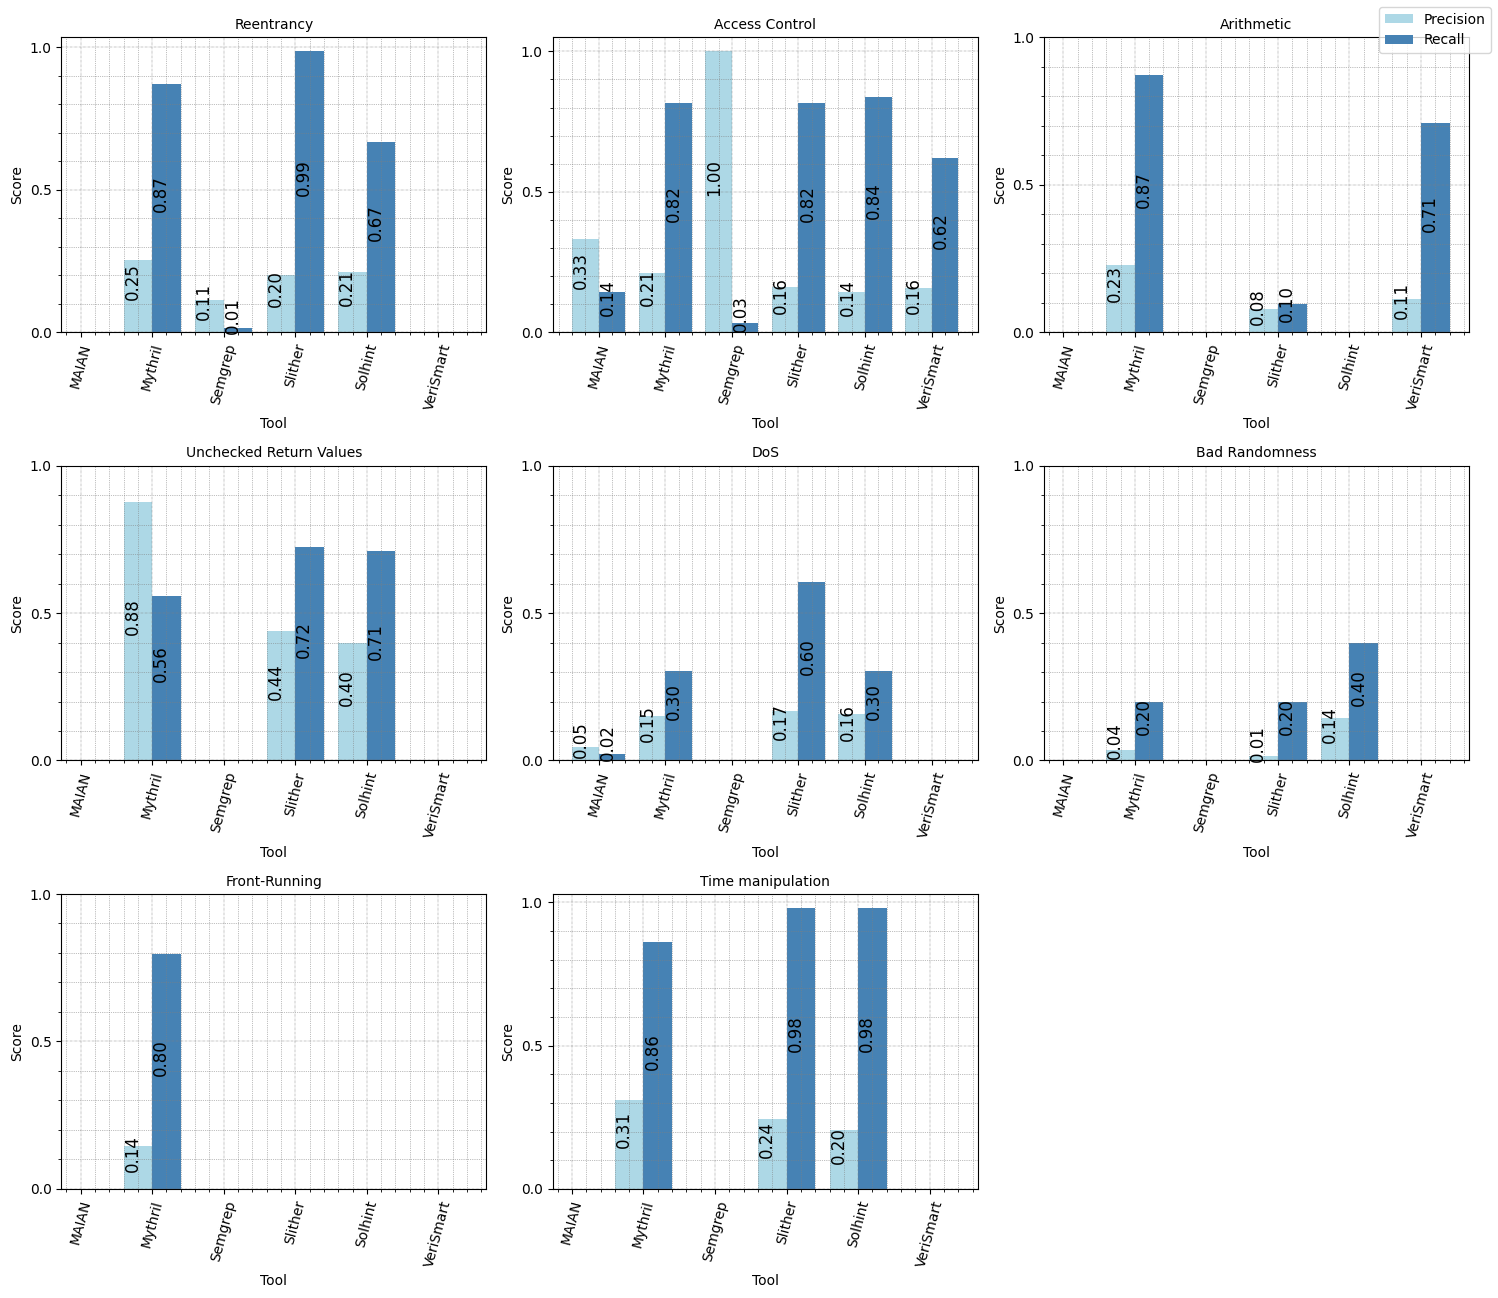

,Base,Label,In Base,Detectable By MAIAN,MAIAN_Recall,MAIAN_Precision,Detectable By Mythril,Mythril_Recall,Mythril_Precision,Detectable By Semgrep,...,Semgrep_Precision,Detectable By Slither,Slither_Recall,Slither_Precision,Detectable By Solhint,Solhint_Recall,Solhint_Precision,Detectable By VeriSmart,VeriSmart_Recall,VeriSmart_Precision
0,TestSet,Reentrancy,True,False,0.0,NaN,True,0.869565,0.253165,True,...,0.111111,True,0.985507,0.20178,True,0.666667,0.210046,False,0.0,NaN
1,TestSet,Access Control,True,True,0.141304,0.333333,True,0.815217,0.211864,True,...,1.0,True,0.815217,0.159915,True,0.836957,0.143389,True,0.619565,0.156593
2,TestSet,Arithmetic,True,False,0.0,NaN,True,0.870968,0.228814,True,...,NaN,True,0.096774,0.077922,False,0.0,NaN,True,0.709677,0.113402
3,TestSet,Unchecked Return Values,True,False,0.0,NaN,True,0.559211,0.876289,False,...,NaN,True,0.723684,0.44,True,0.710526,0.397059,False,0.0,NaN
4,TestSet,DoS,True,True,0.023256,0.045455,True,0.302326,0.151163,False,...,NaN,True,0.604651,0.167742,True,0.302326,0.156627,False,0.0,NaN
5,TestSet,Bad Randomness,True,False,0.0,NaN,True,0.2,0.037037,True,...,0.0,True,0.2,0.014085,True,0.4,0.142857,False,0.0,NaN
6,TestSet,Front-Running,True,False,0.0,NaN,True,0.795455,0.144033,False,...,NaN,False,0.0,NaN,False,0.0,NaN,False,0.0,NaN
7,TestSet,Time manipulation,True,False,0.0,NaN,True,0.86,0.311594,False,...,NaN,True,0.98,0.242574,True,0.98,0.204167,False,0.0,NaN


In [26]:
#Performance of analysis tools
Eval_Results = plot_result(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],['TestSet'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/ToolsPerformanceOnOneBase_Fair.csv',index=False)
Eval_Results

In [ ]:
#Performance of analysis tools and voting methods
Eval_Results = plot_result(['All'],['TestSet'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/ToolsAndVotePerformanceOnOneBase_Fair.csv',index=False)
Eval_Results

### **4.2.2. UnFair Evaluation**
---

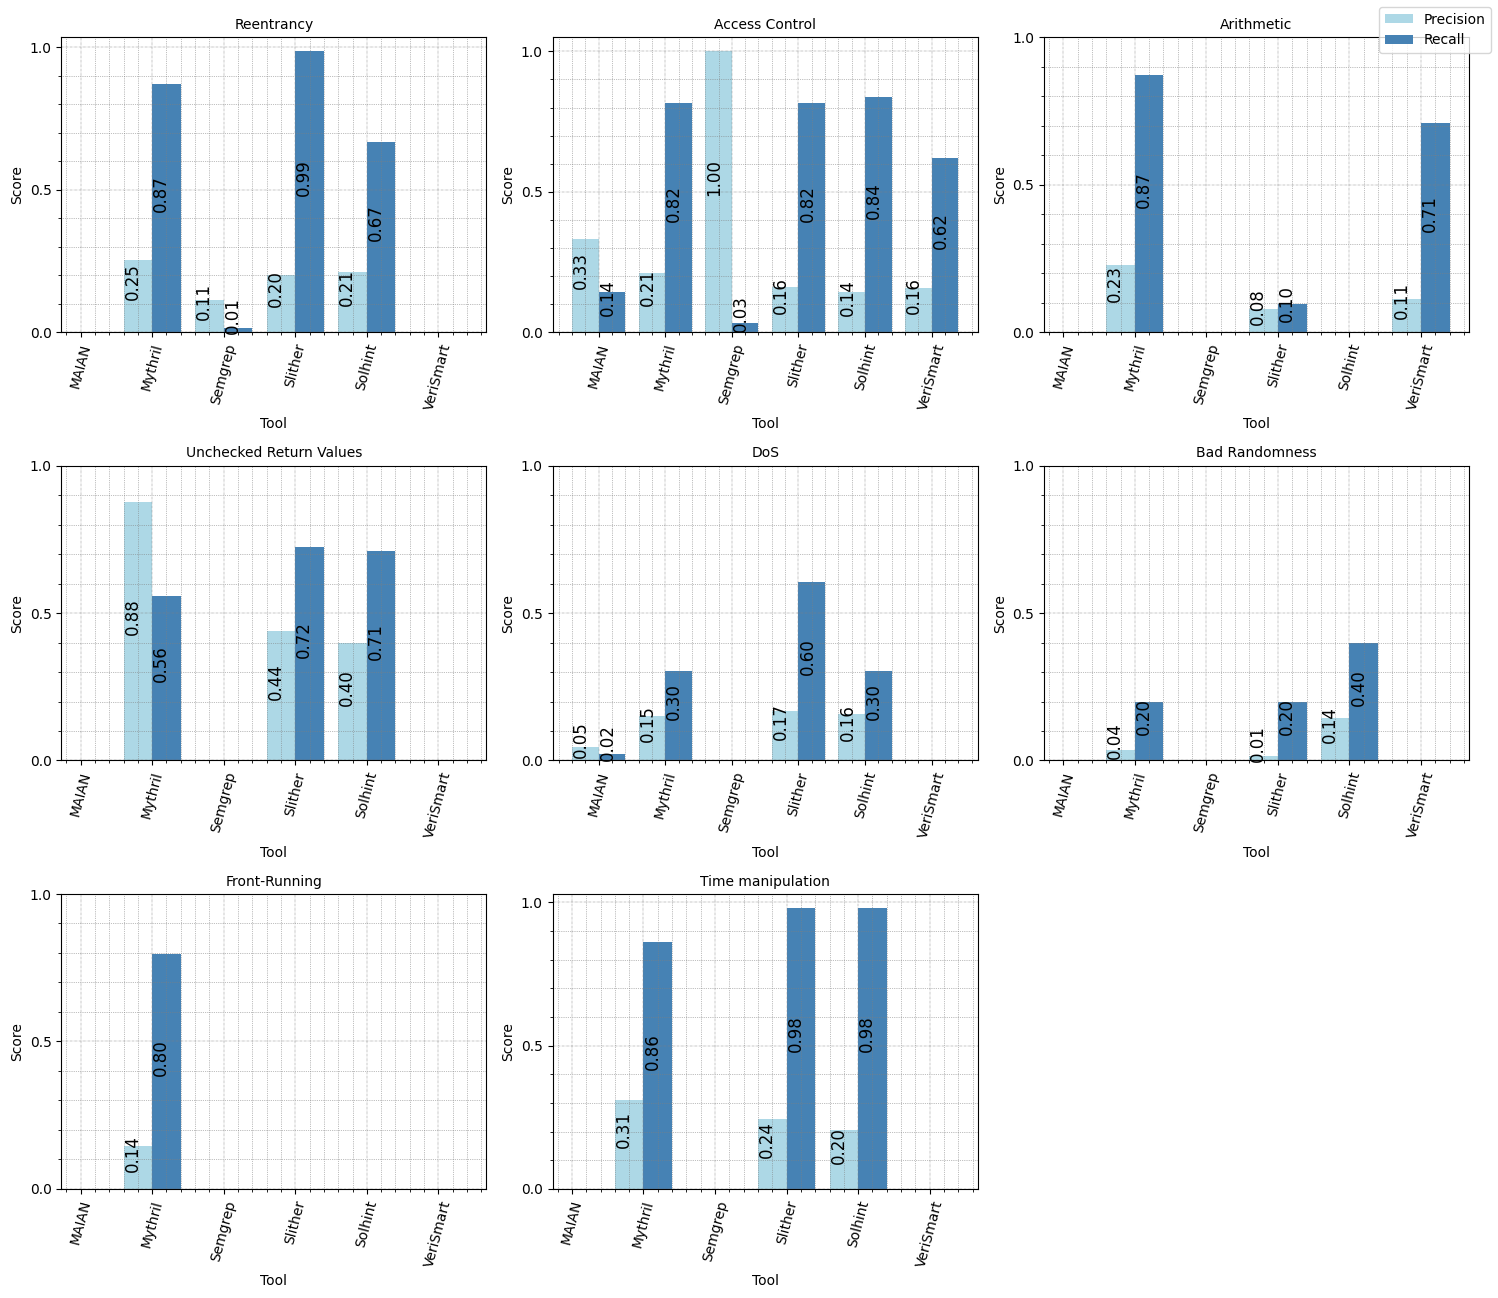

,Base,Label,In Base,Detectable By MAIAN,MAIAN_Recall,MAIAN_Precision,Detectable By Mythril,Mythril_Recall,Mythril_Precision,Detectable By Semgrep,...,Semgrep_Precision,Detectable By Slither,Slither_Recall,Slither_Precision,Detectable By Solhint,Solhint_Recall,Solhint_Precision,Detectable By VeriSmart,VeriSmart_Recall,VeriSmart_Precision
0,TestSet,Reentrancy,True,False,0.0,NaN,True,0.869565,0.253165,True,...,0.111111,True,0.985507,0.20178,True,0.666667,0.210046,False,0.0,NaN
1,TestSet,Access Control,True,True,0.141304,0.333333,True,0.815217,0.211864,True,...,1.0,True,0.815217,0.159915,True,0.836957,0.143389,True,0.619565,0.156593
2,TestSet,Arithmetic,True,False,0.0,NaN,True,0.870968,0.228814,True,...,NaN,True,0.096774,0.077922,False,0.0,NaN,True,0.709677,0.113402
3,TestSet,Unchecked Return Values,True,False,0.0,NaN,True,0.559211,0.876289,False,...,NaN,True,0.723684,0.44,True,0.710526,0.397059,False,0.0,NaN
4,TestSet,DoS,True,True,0.023256,0.045455,True,0.302326,0.151163,False,...,NaN,True,0.604651,0.167742,True,0.302326,0.156627,False,0.0,NaN
5,TestSet,Bad Randomness,True,False,0.0,NaN,True,0.2,0.037037,True,...,0.0,True,0.2,0.014085,True,0.4,0.142857,False,0.0,NaN
6,TestSet,Front-Running,True,False,0.0,NaN,True,0.795455,0.144033,False,...,NaN,False,0.0,NaN,False,0.0,NaN,False,0.0,NaN
7,TestSet,Time manipulation,True,False,0.0,NaN,True,0.86,0.311594,False,...,NaN,True,0.98,0.242574,True,0.98,0.204167,False,0.0,NaN


In [27]:
#Performance of analysis tools
Eval_Results = plot_result(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],['TestSet'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/ToolsPerformanceOnOneBase_UnFair.csv',index=False)
Eval_Results

In [ ]:
#Performance of analysis tools and voting methods
Eval_Results = plot_result(['All'],['TestSet'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/ToolsAndVotePerformanceOnOneBase_UnFair.csv',index=False)
Eval_Results

## **4.3. One Tool on One Base**
---

In [28]:
Eval_Results = plot_result(['Slither'],['TestSet'],Fair=True)
Eval_Results.to_csv('./Results/Charts/Performance/OneToolPerformanceOnOneBase.csv',index=False)
Eval_Results

Unexpected err=KeyError('Slither_AUC-PR'), type(err)=<class 'KeyError'>


KeyError: 'Slither_AUC-PR'

# **5. Get Tools Overlap Degree**
---

## **5.1. Overlap based on flagged data**
---

### **5.1.1. Unfair**
---

In [ ]:
overlapDF = getOverlap(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],False)
overlapDF

### **5.1.2. Fair**
---

In [29]:
overlapDF = getOverlap(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],True)
overlapDF

TypeError: getOverlap() takes 1 positional argument but 2 were given

## **5.2. Overlep perVuln**
---

### **5.2.1. Unfair**
---

/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/toolOverlap_perVuln.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


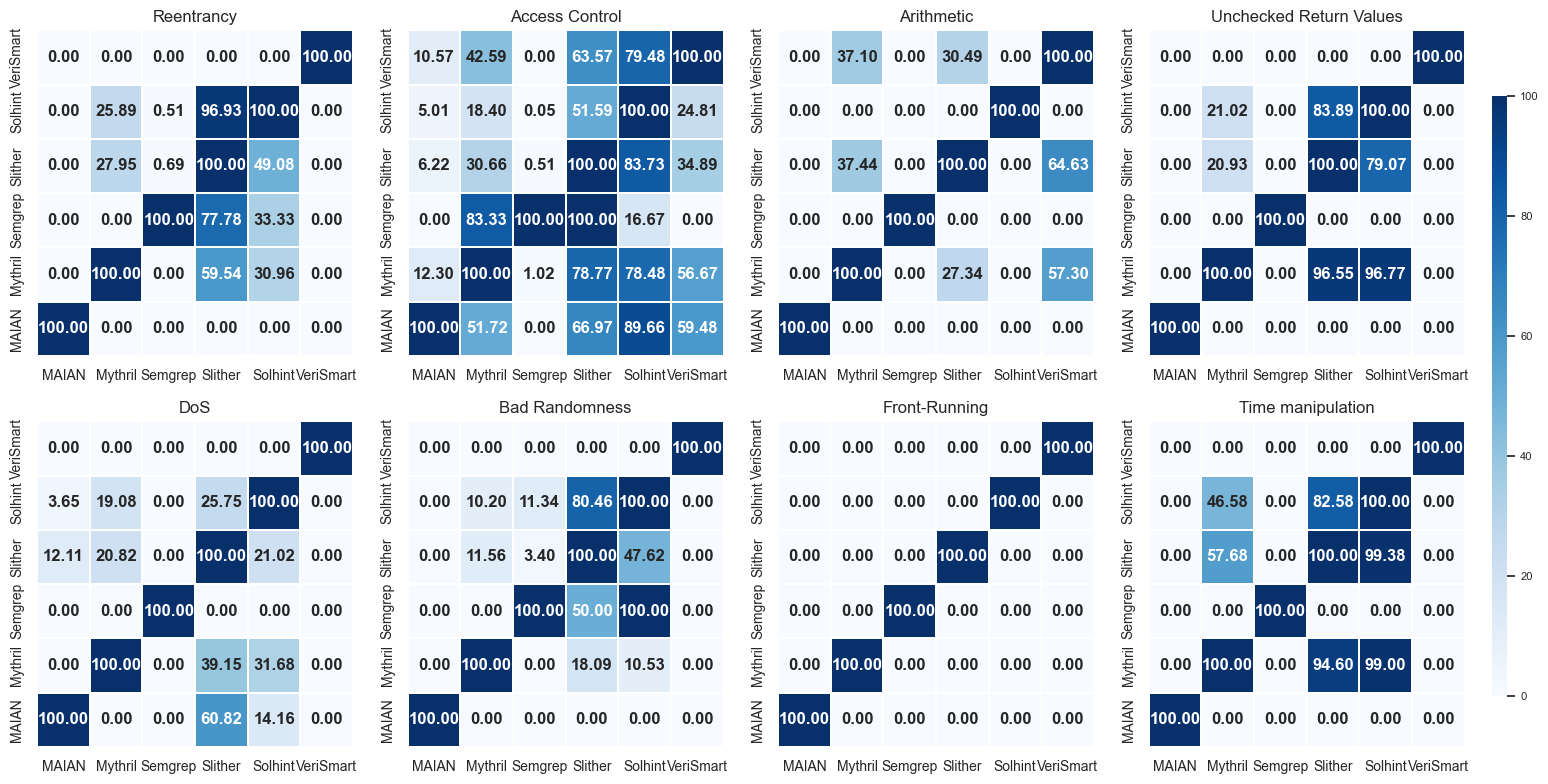

,vulnerability,Baseline,MAIAN,Mythril,Semgrep,Slither,Solhint,VeriSmart
0,Reentrancy,MAIAN,100.0,0,0,0,0,0
1,Access Control,MAIAN,100.0,51.724138,0,66.972477,89.655172,59.482759
2,Arithmetic,MAIAN,100.0,0,0,0,0,0
3,Unchecked Return Values,MAIAN,100.0,0,0,0,0,0
4,DoS,MAIAN,100.0,0,0,60.824742,14.159292,0
5,Bad Randomness,MAIAN,100.0,0,0,0,0,0
6,Front-Running,MAIAN,100.0,0,0,0,0,0
7,Time manipulation,MAIAN,100.0,0,0,0,0,0
8,Reentrancy,Mythril,0,100.0,0,59.538784,30.95723,0
9,Access Control,Mythril,12.295082,100.0,1.02459,78.774617,78.483607,56.673511


In [33]:
overlapDF = getOverlapPerV(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],False)
overlapDF

### **5.2.2. Fair**
---

/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/toolOverlap_perVuln.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


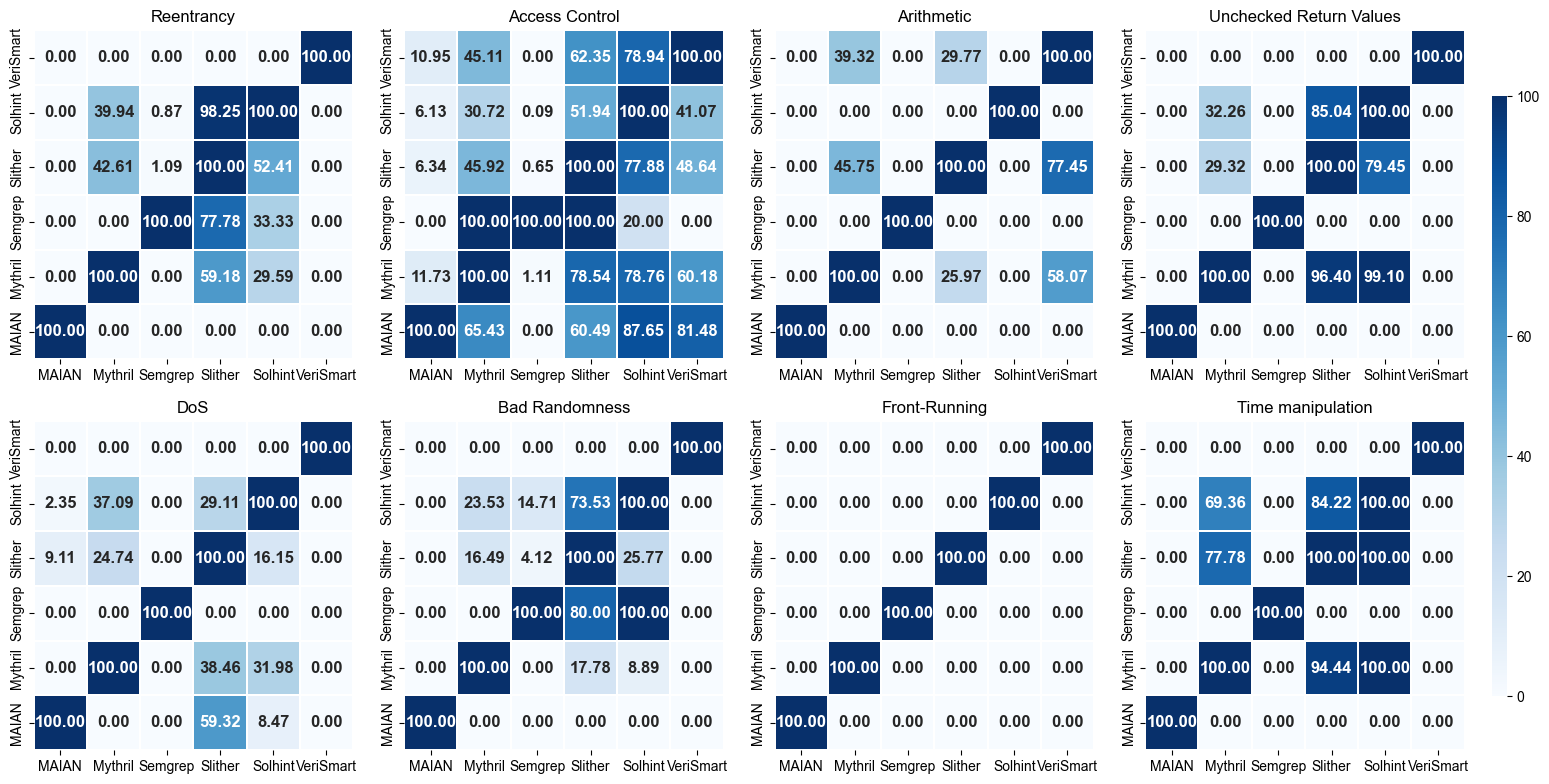

,vulnerability,Baseline,MAIAN,Mythril,Semgrep,Slither,Solhint,VeriSmart
0,Reentrancy,MAIAN,100.0,0,0,0,0,0
1,Access Control,MAIAN,100.0,65.432099,0,60.493827,87.654321,81.481481
2,Arithmetic,MAIAN,100.0,0,0,0,0,0
3,Unchecked Return Values,MAIAN,100.0,0,0,0,0,0
4,DoS,MAIAN,100.0,0,0,59.322034,8.474576,0
5,Bad Randomness,MAIAN,100.0,0,0,0,0,0
6,Front-Running,MAIAN,100.0,0,0,0,0,0
7,Time manipulation,MAIAN,100.0,0,0,0,0,0
8,Reentrancy,Mythril,0,100.0,0,59.179266,29.589633,0
9,Access Control,Mythril,11.725664,100.0,1.106195,78.539823,78.761062,60.176991


In [4]:
overlapDF = getOverlapPerV(['MAIAN','Mythril','Semgrep','Slither','Solhint','VeriSmart'],True)
overlapDF

# **6. Tools Efficiency**
---

/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/ToolEfficiency.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=Tools, rotation=30)
/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/ToolEfficiency.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=Tools, rotation=30)


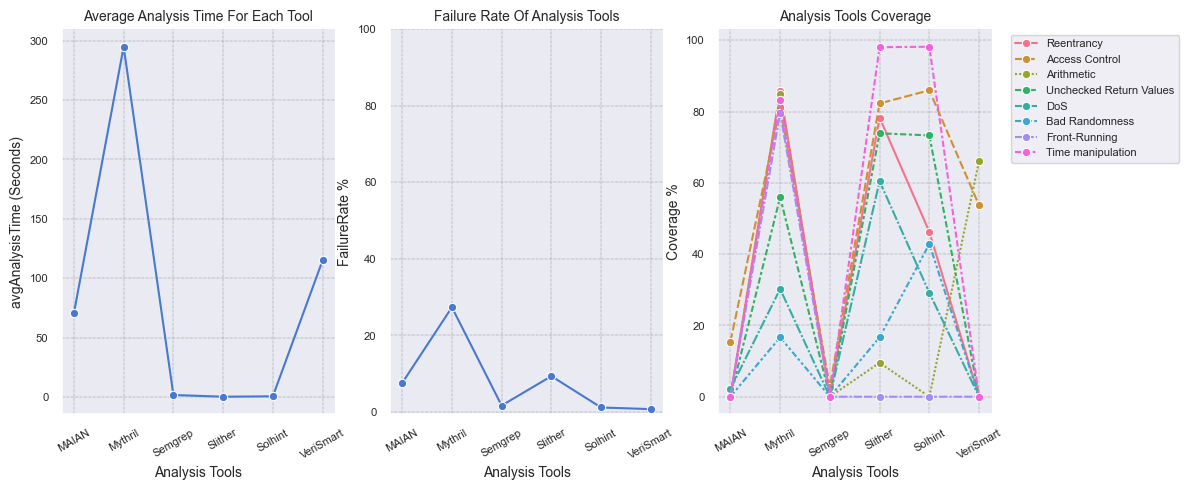

In [31]:
#UnFair Evaluation
get_toolEfficiency(False)

/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/ToolEfficiency.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=Tools, rotation=30)
/Users/shikahjs/Documents/MyFiles/PhDwork/GitHub/MultiTagging Project/MultiTagging_Demo/Scripts/ToolEfficiency.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=Tools, rotation=30)


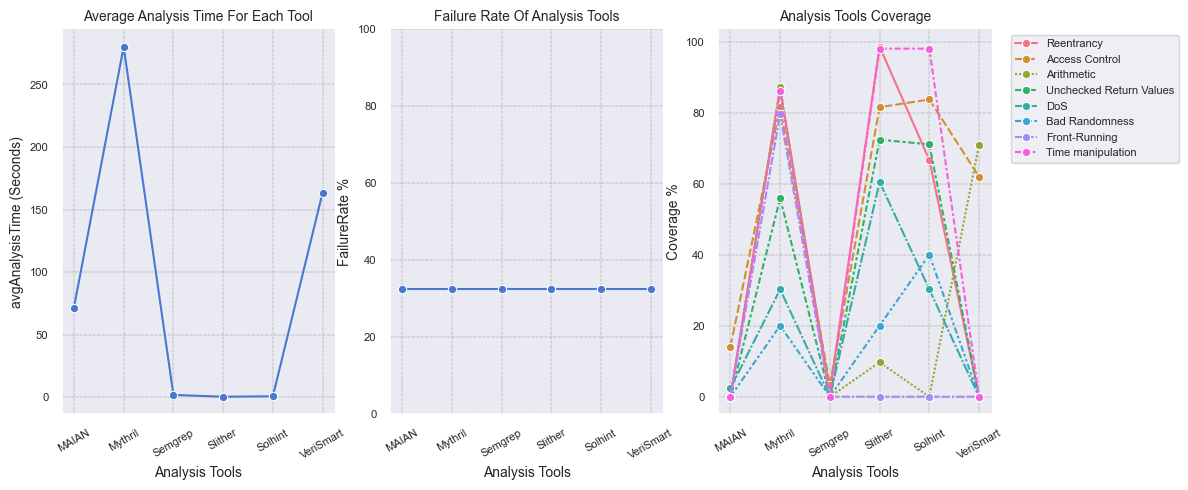

In [32]:
#UnFair Evaluation
get_toolEfficiency(True)